### Gather info to see if theres a link between opioid prescriptions and opioid mortality rates

### Start with bar charts to begin to analyze data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from scipy import stats 
import numpy as np
from sklearn.linear_model import LinearRegression

# Read in CSV file
data = pd.read_csv("opiod-analysis/Resources/Health04/Health04_C.csv")

In [2]:
df = pd.DataFrame(data)

In [3]:
regions = "state_region.txt"

region_data = pd.read_csv(regions)
region_df = pd.DataFrame(region_data).loc[:,['State Code', 'Region', 'Division']].rename(columns={'State Code' : 'st_abb', 'Region' : 'REGION', 'Division' : 'DIVISION'})

In [4]:
merge_data = pd.merge(region_df, df, on="st_abb", how="inner")
print(merge_data.columns)

Index(['st_abb', 'REGION', 'DIVISION', 'G_COUNTYFP', 'COUNTYFP', 'cnty_name',
       'opPrscRt', 'odMortRt14', 'odMortRt15', 'odMortRt16', 'odMortRt17',
       'odMortRt18', 'odMortRtAv'],
      dtype='object')


In [5]:
#merge_data.opPrscRt.plot.box(column="REGION")

### Aggregate By state 

In [6]:
# Group data by state abbreviation and calculate the mean for each group
grouped_data = data.groupby('st_abb')['opPrscRt'].mean()

In [7]:
groupeddf = pd.DataFrame(grouped_data).reset_index()

In [8]:
merge_data1 = pd.merge(region_df, groupeddf, on="st_abb", how="inner")
merge_data1.head(5)

,st_abb,REGION,DIVISION,opPrscRt
0,AK,West,Pacific,14.732258
1,AL,South,East South Central,59.728358
2,AR,South,West South Central,59.914667
3,AZ,West,Mountain,33.473333
4,CA,West,Pacific,36.127586


opPrscRt    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

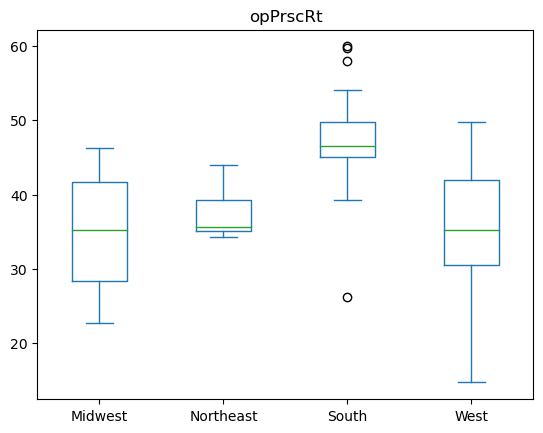

In [9]:
merge_data1.plot.box("REGION")

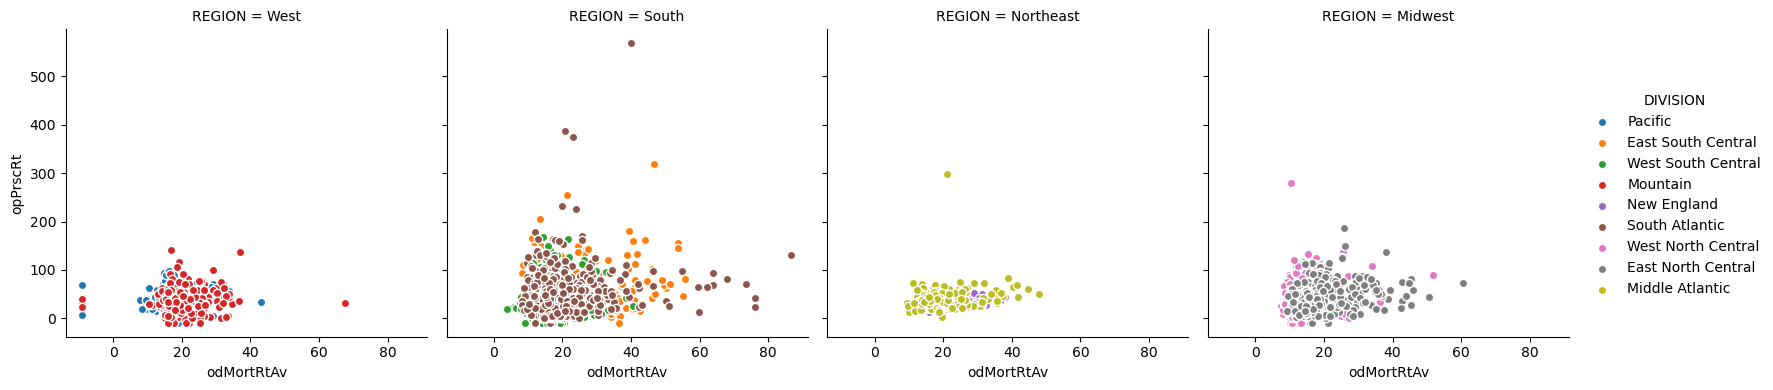

In [10]:
graph = sns.FacetGrid(merge_data, col="REGION", hue="DIVISION", height=4)
graph.map(plt.scatter, "odMortRtAv", "opPrscRt", edgecolor="w").add_legend()
plt.show()


<AxesSubplot:xlabel='st_abb'>

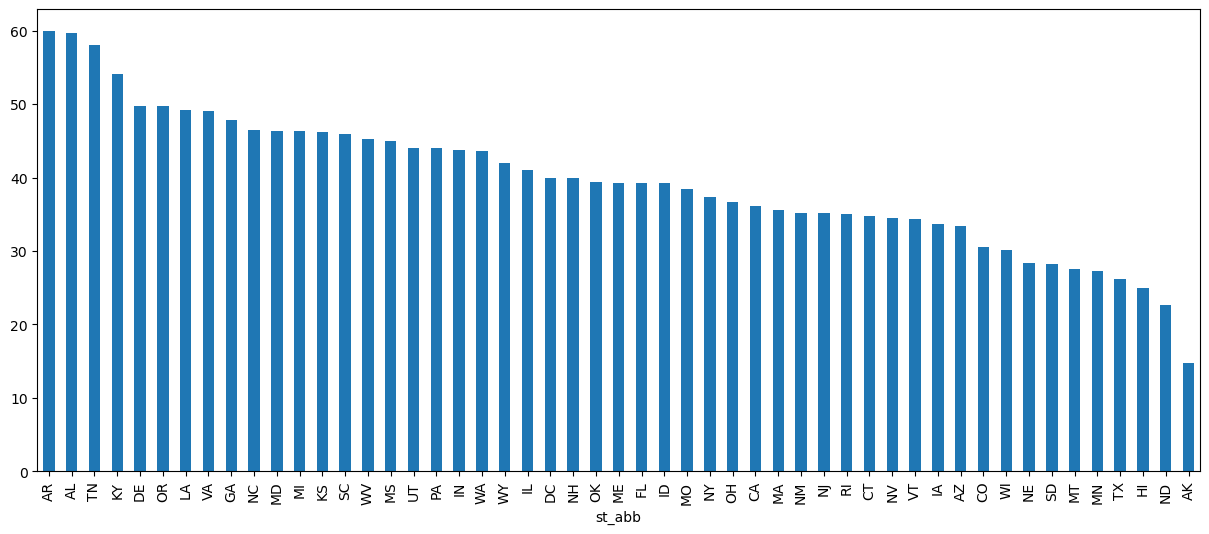

In [11]:
grouped_data.sort_values(ascending=False).plot.bar(figsize=[15,6]) 

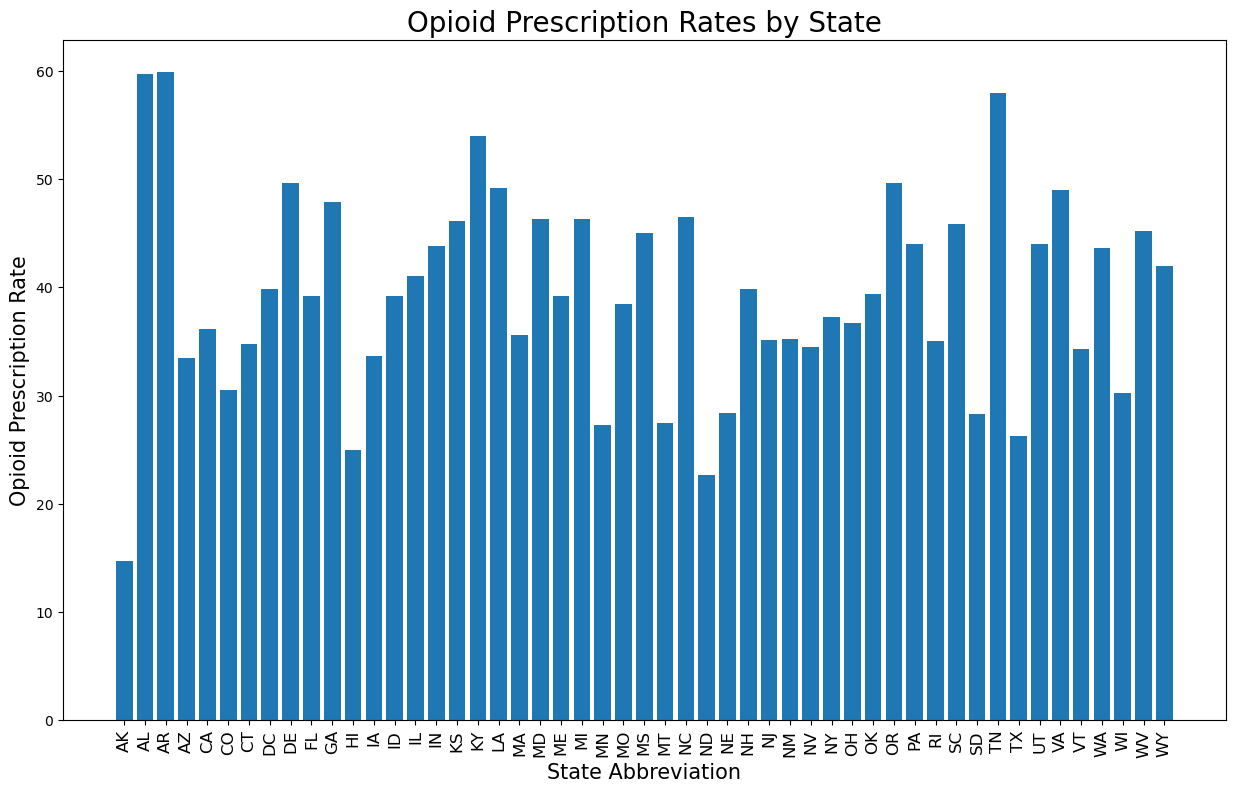

In [12]:
# Set figure size
plt.figure(figsize=[15, 10])

# Plot the data as a bar chart
plt.bar(grouped_data.index, grouped_data.values)

# Set chart title and labels for the axes
plt.title('Opioid Prescription Rates by State', fontsize=20)
plt.xlabel('State Abbreviation', fontsize=15)
plt.ylabel('Opioid Prescription Rate', fontsize=15)

# Rotate the x-axis labels and adjust the spacing
plt.xticks(rotation=90, ha='center', va='top', fontsize=12)
plt.subplots_adjust(bottom=0.2)

# Show the chart
plt.show()

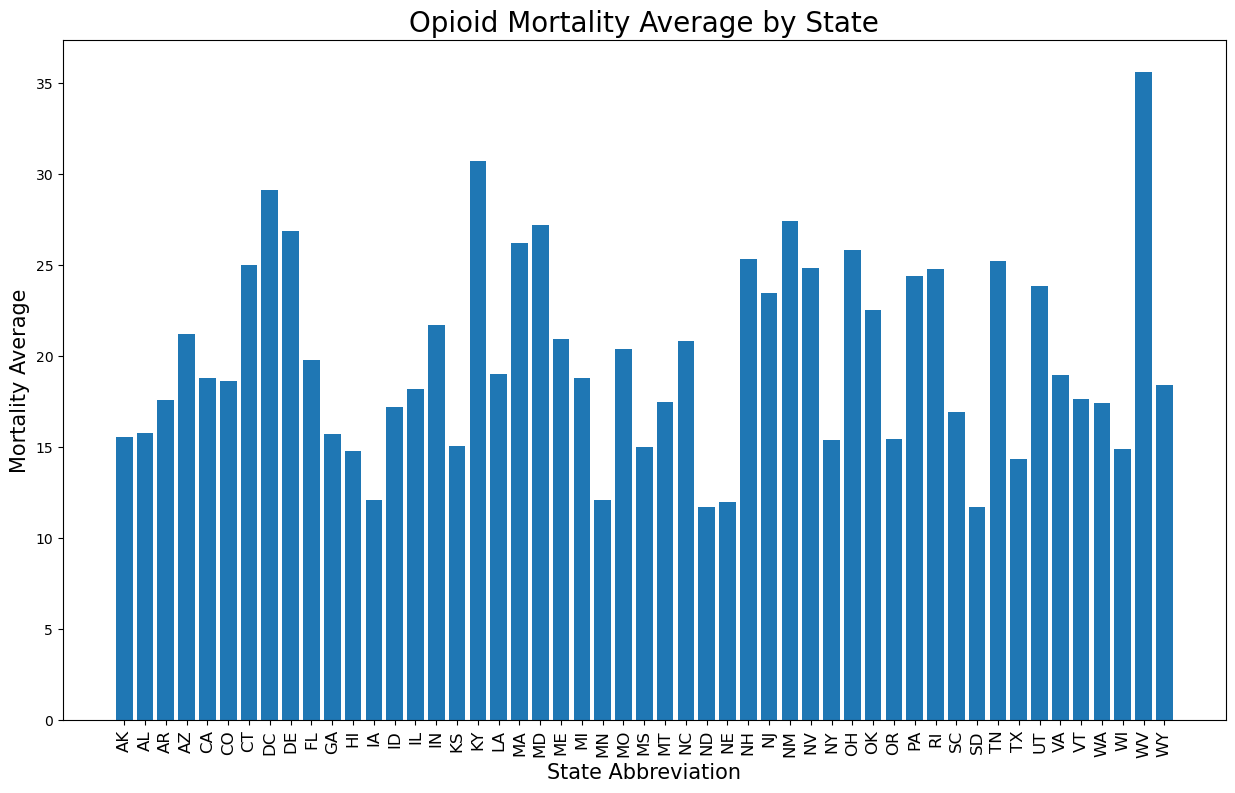

In [13]:
# Read in CSV file
data1 = pd.read_csv("opiod-analysis/Resources/Health04/Health04_C.csv")


# Group data by state abbreviation and calculate the mean for each group
grouped_data1 = data.groupby('st_abb')['odMortRtAv'].mean()

# Set figure size
plt.figure(figsize=[15, 10])

# Plot the data as a bar chart
plt.bar(grouped_data1.index, grouped_data1.values)

# Set chart title and labels for the axes
plt.title('Opioid Mortality Average by State', fontsize=20)
plt.xlabel('State Abbreviation', fontsize=15)
plt.ylabel('Mortality Average', fontsize=15)

# Rotate the x-axis labels and adjust the spacing
plt.xticks(rotation=90, ha='center', va='top', fontsize=12)
plt.subplots_adjust(bottom=0.2)

# Show the chart
plt.show()

### Use map to plot prescrption rate and list mortality rate by state
### Here's a visual aid by state of what the bar graphs showed

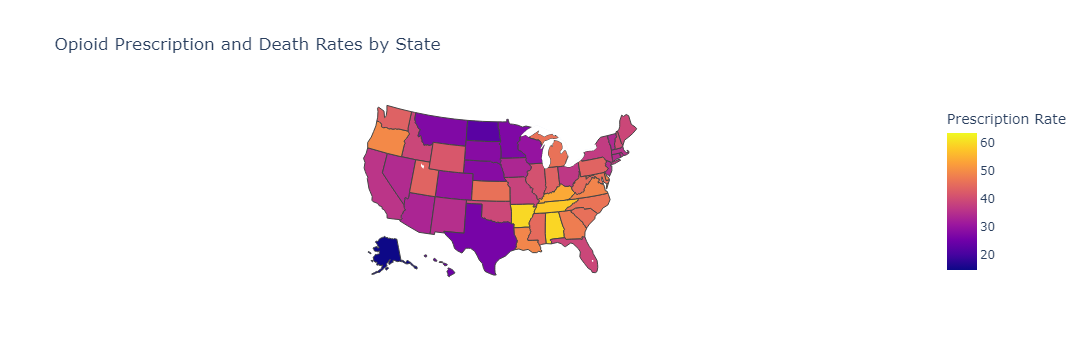

In [16]:
# Read in CSV file with opioid prescription rate and death data
data2 = pd.read_csv("opiod-analysis/Resources/Health04/Health04_C.csv")

# Group data by state and calculate opioid prescription and death rates
state_data = data2.groupby('st_abb')[['opPrscRt', 'odMortRtAv']].mean().reset_index()

# Create choropleth map plot of opioid prescription and death rates by state
state_fig = px.choropleth(state_data, locations='st_abb', locationmode="USA-states", color='opPrscRt',
                    scope="usa", color_continuous_scale=px.colors.sequential.Plasma,
                    title='Opioid Prescription and Death Rates by State',
                    color_continuous_midpoint=state_data['opPrscRt'].median(),
                    labels={'opPrscRt': 'Opioid Prescription Rate'},
                    )
# Add opioid prescription rate and death rate to the hover text
state_fig.update_traces(hovertemplate='<b>%{location}</b><br><br>Opioid Prescription Rate: %{z:.2f}<br>Opioid Death Rate: %{customdata[1]:.2f}',
                        customdata=np.stack((state_data['opPrscRt'], state_data['odMortRtAv']), axis=-1))
state_fig.update_layout(coloraxis_colorbar=dict(title='Prescription Rate'))
state_fig.show()
